# Titanic Kaggle competition

Исследование классических алгоритмов машинноого обучения на примере titanic датасета из соревнования kaggle:

Will Cukierski. (2012). Titanic - Machine Learning from Disaster.  https://www.kaggle.com/competitions/titanic

Подгрузим необходимые библиотеки

In [532]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [533]:
sns.set()

Подгрузим данные в формате DataFrame

In [534]:
train_df = pd.read_csv(r'titanic_data/train.csv')
test_df = pd.read_csv(r'titanic_data/test.csv')

## Exploratory Data Analysis

In [535]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin - большинство значений пустые, скорее всего не очень информативный признак, можем его не учитывать. Также мы видим, что есть пропуски в данных для Age и Embarked

Также посмотрим и на тестовую выборку

In [536]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


В тестовой выборке также много пропусков в поле Cabin, есть пропуски в полях Fare и Age.

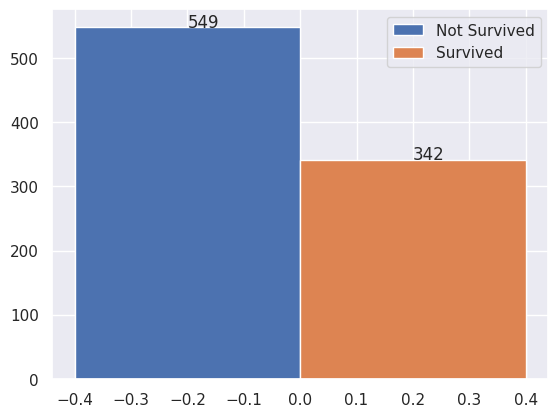

In [537]:
dead = len(train_df[train_df['Survived'] == 0])
alive = len(train_df[train_df['Survived'] == 1])
plt.bar(-0.2, dead, width=0.4, label = 'Not Survived')
plt.bar(0.2, alive, width=0.4, label = 'Survived')
plt.text(-0.2, dead, dead)
plt.text(0.2, alive, alive)
plt.legend()

Как видим, есть небольшой дизбаланс в данных

Text(0.5, 1.0, 'Распределение пассажиров по возрасту')

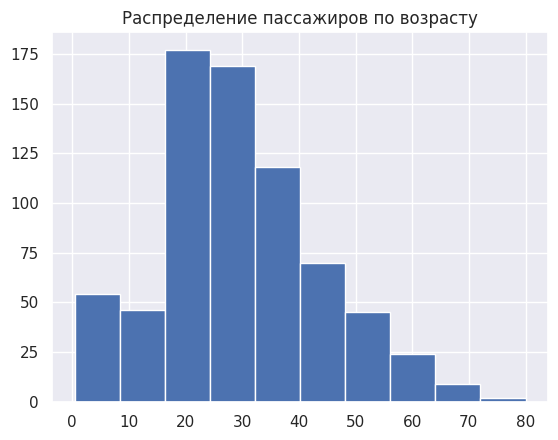

In [538]:
plt.hist(train_df.Age)
plt.title('Распределение пассажиров по возрасту')

Text(0.5, 1.0, 'not survived')

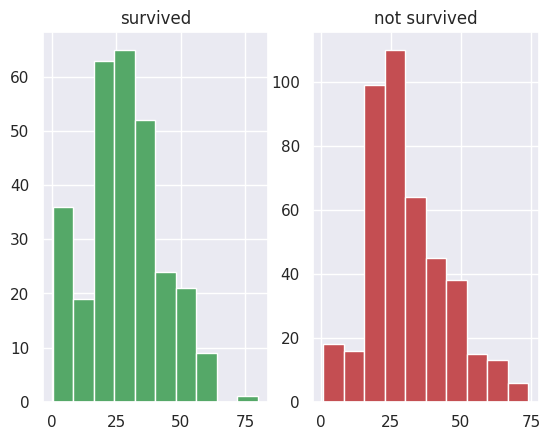

In [539]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(train_df[train_df['Survived'] == 1]['Age'], color='g')
ax1.set_title('survived')
ax2.hist(train_df[train_df['Survived'] == 0]['Age'], color='r')
ax2.set_title('not survived')

Как видно из графиков, количество выживших зависит от возраста, например, выживших детей гораздо больше, особенно в процентном соотношении с учетом дисбаланса классов.

Взглянем также на распределение выживших и погибших пассажиров по цене билета

Text(0.5, 1.0, 'not survived')

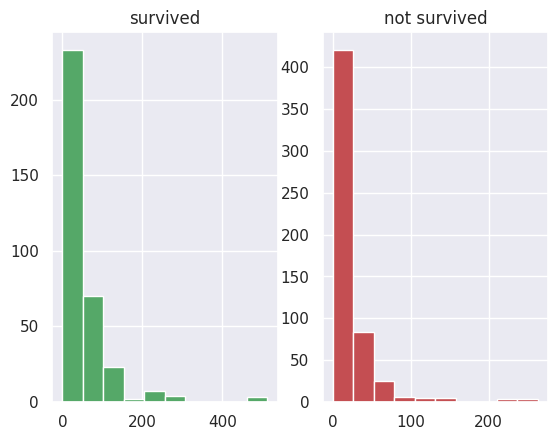

In [540]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(train_df[train_df['Survived'] == 1]['Fare'], color='g')
ax1.set_title('survived')
ax2.hist(train_df[train_df['Survived'] == 0]['Fare'], color='r')
ax2.set_title('not survived')

Признак имеет важное значение, так как, как мы видим, все люди с ценой билета выше 400 выжили

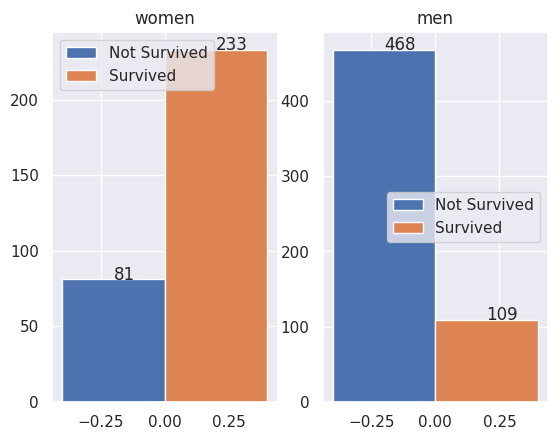

In [541]:
fig, (ax1, ax2) = plt.subplots(1,2)
#women
dead = len(train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'female')])
alive = len(train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'female')])
ax1.bar(-0.2, dead, width=0.4, label = 'Not Survived')
ax1.bar(0.2, alive, width=0.4, label = 'Survived')
ax1.text(-0.2, dead, dead)
ax1.text(0.2, alive, alive)
ax1.set_title('women')
ax1.legend()

#men
dead = len(train_df[(train_df['Survived'] == 0) & (train_df['Sex'] == 'male')])
alive = len(train_df[(train_df['Survived'] == 1) & (train_df['Sex'] == 'male')])
ax2.bar(-0.2, dead, width=0.4, label = 'Not Survived')
plt.bar(0.2, alive, width=0.4, label = 'Survived')
ax2.text(-0.2, dead, dead)
ax2.text(0.2, alive, alive)
ax2.set_title('men')
ax2.legend()

Также можно заметить, что процентное соотношение выживших женщин куда выше, чем мужчин(относительно общего количества женщин и мужчин соответсвенно)

Посмотрим на зависимость количества выживших и погибших от места посадки

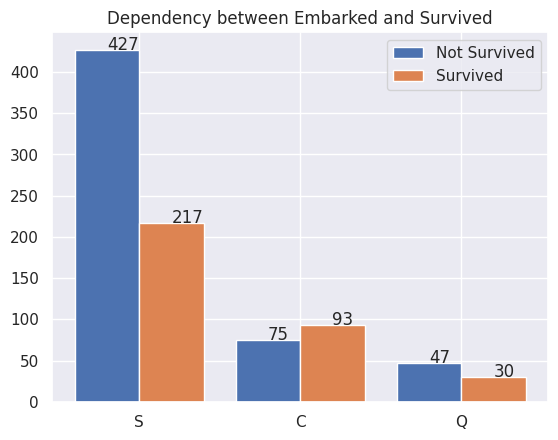

In [542]:
labels = train_df[train_df['Embarked'].notna()]['Embarked'].unique()
X_axis = np.arange(len(labels))

dead = []
alive = []

for i in X_axis:
    dead.append(len(train_df[(train_df['Survived'] == 0) & (train_df['Embarked'] == labels[i])]))
    alive.append(len(train_df[(train_df['Survived'] == 1) & (train_df['Embarked'] == labels[i])]))

plt.bar(X_axis - 0.2, dead, width=0.4, label = 'Not Survived')
plt.bar(X_axis + 0.2, alive, width=0.4, label = 'Survived')

for i in range(len(labels)):
    plt.text(i - 0.2, dead[i], dead[i])
    plt.text(i + 0.2, alive[i], alive[i])

plt.xticks(np.arange(len(labels)), labels)
plt.title('Dependency between Embarked and Survived')
plt.legend()

Видим также что и категориальный признак места посадки пассажира имеет вес, так как например при посадке в Cherbourg был выше шанс выжить чем умереть.

## Подготавливаем набор данных

Еще раз посмотрим на данные

In [543]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Напишем функцию для предобработки данных:

In [544]:
def prepare_data(data_df: pd.DataFrame) -> pd.DataFrame:
    new_data_df = data_df
    #Преобразовываем исходные данные
    new_data_df['Embarked'] = data_df['Embarked'].replace(pd.NA, data_df['Embarked'].value_counts().idxmax()) #заменим отсутсвующие данные на самый частый класс
    new_data_df['Age'] = data_df['Age'].fillna(data_df['Age'].mean()) #заменим отсутствующие поля на средний возраст
    new_data_df['Fare'] = data_df['Fare'].fillna(data_df['Fare'].mean()) #заменим отсутствующие поля на среднюю цену
    new_data_df['Sex'] = data_df['Sex'].replace(['male', 'female'], [0, 1]) #заменим поля для поля Sex на бинарные метки
    one_hot = pd.get_dummies(data_df['Embarked'], dtype=int) #one-hot encoding для кодирования города посадки
    new_data_df = new_data_df.drop(columns=['Cabin', 'Ticket', 'Name', 'Embarked']) #дропаем лишние столбцы
    new_data_df = pd.concat([new_data_df, one_hot], axis='columns')

    return new_data_df 


In [545]:
new_train_df = prepare_data(train_df)

/tmp/ipykernel_2429/1461219267.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data_df['Sex'] = data_df['Sex'].replace(['male', 'female'], [0, 1]) #заменим поля для поля Sex на бинарные метки


In [546]:
new_train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1


In [547]:
new_test_df = prepare_data(test_df)

/tmp/ipykernel_2429/1461219267.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data_df['Sex'] = data_df['Sex'].replace(['male', 'female'], [0, 1]) #заменим поля для поля Sex на бинарные метки


In [548]:
new_test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,892,3,0,34.5,0,0,7.8292,0,1,0
1,893,3,1,47.0,1,0,7.0000,0,0,1
2,894,2,0,62.0,0,0,9.6875,0,1,0
3,895,3,0,27.0,0,0,8.6625,0,0,1
4,896,3,1,22.0,1,1,12.2875,0,0,1


In [549]:
new_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   C            418 non-null    int64  
 8   Q            418 non-null    int64  
 9   S            418 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 32.8 KB


## Предсказание с использованием различных алгоритмов

Для начала попробуем посмотреть на данные, с использованием алгоритмов понижения размерности

Используем StandartScaler из sklearn для стандартизации данных

In [550]:
from sklearn.preprocessing import StandardScaler

y_train = new_train_df['Survived']
X_train = new_train_df.drop(columns=['Survived', 'PassengerId'])

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

SVD

In [551]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()
svd.fit(X_train)
transformed = svd.transform(X_train)

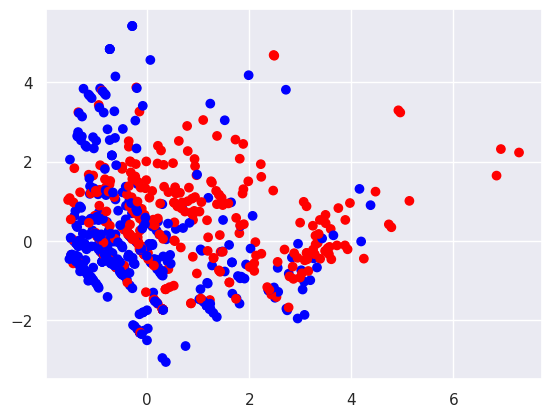

In [552]:
plt.scatter(transformed.T[0], transformed.T[1], c=y_train, cmap='bwr')

Результат не особо впечатляет

t-SNE

In [553]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=35)
X_embedded = tsne.fit_transform(X_train)

In [554]:
X_embedded.shape

(891, 2)

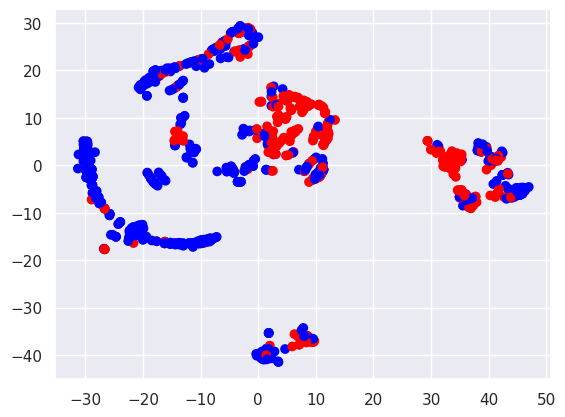

In [555]:
plt.scatter(X_embedded.T[0], X_embedded.T[1], c=y_train, cmap='bwr')

Также и с помощью t-SNE не получилось представить классы явно разделимыми

В исходном соревновании используется такая метрика, как accuracy

In [556]:
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

### Линейные модели

In [557]:
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [558]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

Логистическая регрессия со штрафом l2

In [559]:
lr_l2 = LogisticRegression(penalty='l2', class_weight='balanced')

In [560]:
lr_l2.fit(X_train_v, y_train_v)

LogisticRegression(class_weight='balanced')

In [561]:
y_pred = lr_l2.predict(X_val)
print(f'accuracy: {accuracy_score(y_val, y_pred)}') #предсказания с базовым порогом 0.5

accuracy: 0.8212290502793296


In [562]:
thresholds = np.linspace(0,1,11)

In [563]:
results = []
for threshold in thresholds:
    y_pred = lr_l2.predict_proba(X_val)
    y_pred = (y_pred[:,1] > threshold).astype('int32')
    results.append(accuracy_score(y_val, y_pred))

Text(0.5, 1.0, 'accuracy from threshold')

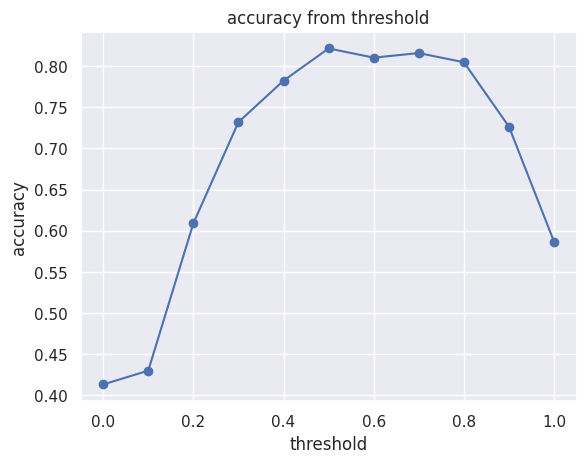

In [564]:
plt.plot(thresholds, results, marker='o')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.title('accuracy from threshold')

In [565]:
thresholds[results.index(max(results))]

np.float64(0.5)

Логистическая регрессия со штрафом l1

In [566]:
lr_l1 = LogisticRegression(penalty='l1', class_weight='balanced', solver='liblinear')

In [567]:
lr_l1.fit(X_train_v, y_train_v)

y_pred = lr_l1.predict(X_val)
print(f'accuracy: {accuracy_score(y_val, y_pred)}') #предсказания с базовым порогом 0.5

accuracy: 0.8156424581005587


In [568]:
results = []
for threshold in thresholds:
    y_pred = lr_l1.predict_proba(X_val)
    y_pred = (y_pred[:,1] > threshold).astype('int32')
    results.append(accuracy_score(y_val, y_pred))

Text(0.5, 1.0, 'accuracy from threshold')

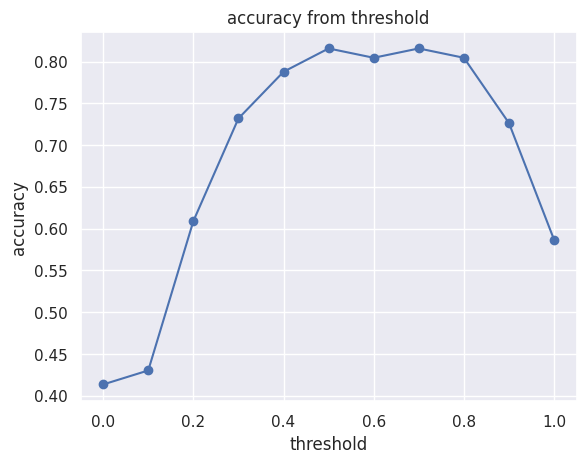

In [569]:
plt.plot(thresholds, results, marker='o')
plt.xlabel('threshold')
plt.ylabel('accuracy')
plt.title('accuracy from threshold')

In [570]:
thresholds[results.index(max(results))]

np.float64(0.5)

Elastic-net logistic regression

In [571]:
lr_elastic = LogisticRegression(penalty='elasticnet', class_weight='balanced', solver='saga', l1_ratio=0.3)

In [572]:
lr_elastic.fit(X_train_v, y_train_v)

y_pred = lr_elastic.predict(X_val)
print(f'accuracy: {accuracy_score(y_val, y_pred)}') #предсказания с базовым порогом 0.5

accuracy: 0.8156424581005587


RidgeClassifier

In [573]:
ridge = RidgeClassifier()

ridge.fit(X_train_v, y_train_v)

y_pred = ridge.predict(X_val)
print(f'accuracy: {accuracy_score(y_val, y_pred)}') #предсказания с базовым порогом 0.5

accuracy: 0.7932960893854749


SVM

In [574]:
from sklearn.svm import SVC

In [575]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

In [576]:
results = []
svcs = []
for kernel in kernels:
    svc = SVC(kernel=kernel, class_weight='balanced')
    svc.fit(X_train_v, y_train_v)
    y_pred = svc.predict(X_val)
    results.append(accuracy_score(y_val, y_pred))
    svcs.append(svc)

In [577]:
results #best kernel - poly

[0.7821229050279329,
 0.8212290502793296,
 0.7988826815642458,
 0.7150837988826816]

knn

In [578]:
from sklearn.neighbors import KNeighborsClassifier

In [579]:
results = []
n_neighbors = [3, 5, 7]
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, algorithm='kd_tree', weights='distance')
    knn.fit(X_train_v, y_train_v)
    y_pred = knn.predict(X_val)
    results.append(accuracy_score(y_val, y_pred))

In [580]:
results

[0.776536312849162, 0.7821229050279329, 0.7877094972067039]

Дерево решений

In [581]:
from sklearn.tree import DecisionTreeClassifier

In [582]:
results = []
max_depth = np.arange(5, 20, 1)

for i in max_depth:
    tree_class = DecisionTreeClassifier(max_depth=i, class_weight='balanced')
    tree_class.fit(X_train_v, y_train_v)
    y_pred = tree_class.predict(X_val)
    results.append(accuracy_score(y_val, y_pred))

Text(0.5, 1.0, 'accuracy from tree depth')

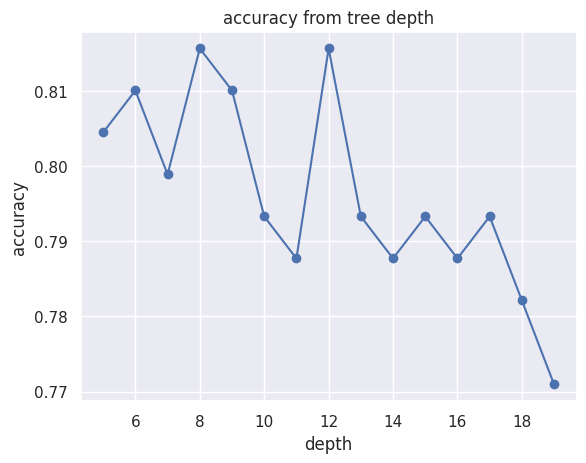

In [583]:
plt.plot(max_depth, results, marker='o')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.title('accuracy from tree depth')

RandomForest

In [601]:
from sklearn.ensemble import RandomForestClassifier

In [606]:
clf = RandomForestClassifier(n_estimators=150, class_weight='balanced', n_jobs=-1)
clf.fit(X_train_v, y_train_v)
y_pred = clf.predict(X_val)
result = accuracy_score(y_val, y_pred)


In [607]:
result

0.8268156424581006

Пока лучший скор у RandomForest и LogisticRegression

Полносвязная нейросеть

In [587]:
from sklearn.neural_network import MLPClassifier

In [611]:
clf = MLPClassifier(random_state=33, max_iter=1000, hidden_layer_sizes=(100, 32, 8))
clf.fit(X_train_v, y_train_v)
y_pred = clf.predict(X_val)
score = accuracy_score(y_val, y_pred)
score

0.8435754189944135

Градиентный бустинг над решающими деревьями

In [476]:
from xgboost import XGBClassifier


In [494]:
bst = XGBClassifier(n_estimators=25, max_depth=6, learning_rate=0.2, objective='binary:logistic', device='cuda')
bst.fit(X_train_v, y_train_v)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [495]:
y_pred = bst.predict(X_val)
score = accuracy_score(y_val,y_pred)
score

0.8324022346368715

Используем непредобработанные данные

In [517]:
X_train = train_df.drop(columns=['PassengerId', 'Survived', 'Cabin', 'Name','Ticket'])
X_train['Embarked'] = X_train['Embarked'].astype("category")

In [518]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    int64   
 1   Sex       891 non-null    int64   
 2   Age       891 non-null    float64 
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Fare      891 non-null    float64 
 6   Embarked  891 non-null    category
dtypes: category(1), float64(2), int64(4)
memory usage: 42.9 KB


In [519]:
X_train_v, X_val, y_train_v, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [524]:
bst = XGBClassifier(n_estimators=25, max_depth=6, learning_rate=0.2, objective='binary:logistic',enable_categorical=True, device='cuda')
bst.fit(X_train_v, y_train_v)
y_pred = bst.predict(X_val)
score = accuracy_score(y_val,y_pred)
score

0.8324022346368715

Теперь сформируем предсказания для соревнования

Лучшие модели: logreg l2, randomforest, xgboost classifier, mlp

In [613]:
y_train = new_train_df['Survived']
X_train = new_train_df.drop(columns=['Survived', 'PassengerId'])

In [619]:
lr = LogisticRegression(penalty='l2', class_weight='balanced',max_iter=1000)
rf = RandomForestClassifier(n_estimators=150, class_weight='balanced', n_jobs=-1)
bst = XGBClassifier(n_estimators=25, max_depth=6, learning_rate=0.2, objective='binary:logistic', device='cuda')
clf = MLPClassifier(random_state=33, max_iter=1000, hidden_layer_sizes=(100, 32, 8))

In [625]:
X_test = prepare_data(test_df)
PassangerId = X_test['PassengerId']
X_test = X_test.drop(columns=['PassengerId'])

In [626]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    418 non-null    float64
 6   C       418 non-null    int64  
 7   Q       418 non-null    int64  
 8   S       418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [622]:
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
bst.fit(X_train, y_train)
clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 32, 8), max_iter=1000, random_state=33)

In [627]:
y_lr = lr.predict(X_test)
y_rf = rf.predict(X_test)
y_bst = bst.predict(X_test)
y_mlp = clf.predict(X_test)

In [634]:
predictions = [y_lr, y_rf, y_bst, y_mlp]

In [632]:
result_df = pd.DataFrame({'PassengerId': PassangerId.values, 'Survived':y_lr})

In [636]:
for i in range(4):
    result_df = pd.DataFrame({'PassengerId': PassangerId.values, 'Survived':predictions[i]})
    result_df.to_csv(f'titanic_data/resultdf{i}.csv', index=False)